# Visualize topographic and climatic distributions

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import random

In [2]:
file_path = Path('/Users/wmk934/data/perceptual_models/data/shapefiles')
file_name = 'north_america_elev_slope_im_imr_fs.gpkg'

In [3]:
shp = gpd.read_file(file_path/file_name)

### Visualize distributions
#### Topography

In [4]:
# Create the heatmap
vec_mean = shp['elev_mean'][~np.isnan(shp['elev_mean'])]
vec_stdv = shp['elev_stdev'][~np.isnan(shp['elev_stdev'])]
H, xedges, yedges = np.histogram2d(vec_mean,vec_stdv, bins=(np.arange(-100,4000,100), np.arange(0,1300,25)))
# Histogram does not follow Cartesian convention (see Notes), therefore transpose H for visualization purposes.
H = H.T
X, Y = np.meshgrid(xedges, yedges)

/var/folders/w4/hh0hkdr92cg8llf8s0l5rzj80000gq/T/ipykernel_40759/813683141.py:8: RuntimeWarning: divide by zero encountered in log
  pcm = axs[2].pcolormesh(X, Y, np.log(H))


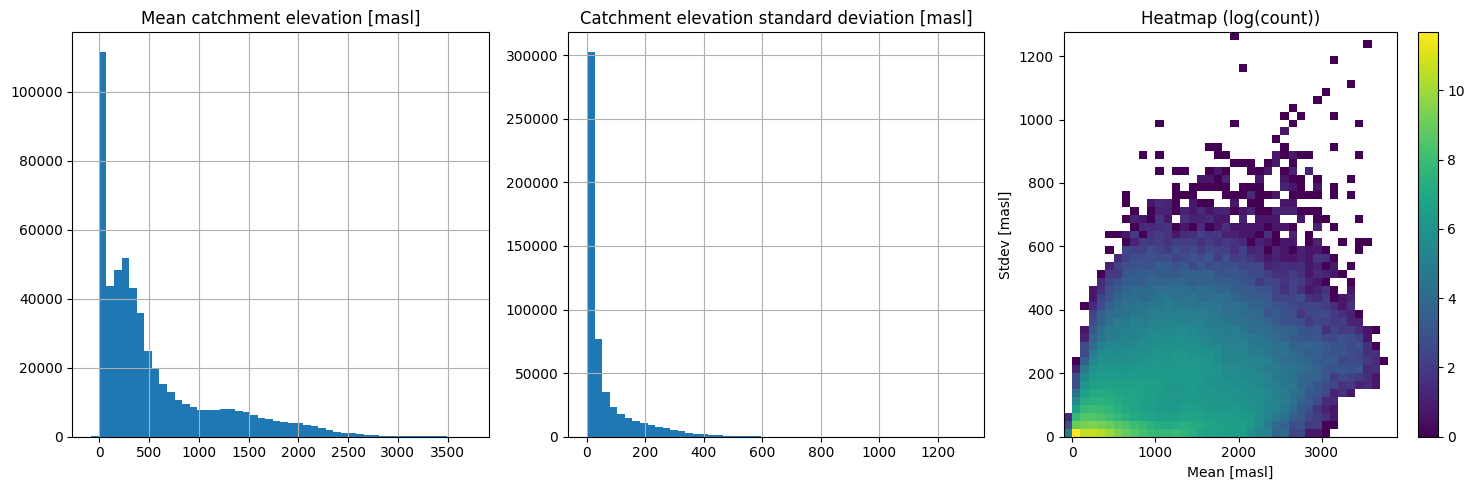

In [5]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

shp['elev_mean'].hist(ax=axs[0], bins=50)
axs[0].set_title('Mean catchment elevation [masl]')
shp['elev_stdev'].hist(ax=axs[1], bins=50)
axs[1].set_title('Catchment elevation standard deviation [masl]')

pcm = axs[2].pcolormesh(X, Y, np.log(H))
fig.colorbar(pcm,ax=axs[2])
axs[2].set_xlabel('Mean [masl]')
axs[2].set_ylabel('Stdev [masl]')
axs[2].set_title('Heatmap (log(count))')

plt.tight_layout()

#### Climate

In [6]:
## Create the heatmaps
vec_im  = shp['im_mean'][~np.isnan(shp['im_mean'])]
vec_imr = shp['imr_mean'][~np.isnan(shp['imr_mean'])]
vec_fs  = shp['fs_mean'][~np.isnan(shp['fs_mean'])]

# Get the 2d histograms
H_im_imr, xedges_im_imr, yedges_im_imr = np.histogram2d(vec_im, vec_imr, bins=50)
H_im_fs,  xedges_im_fs,  yedges_im_fs  = np.histogram2d(vec_im, vec_fs,  bins=50)
H_imr_fs, xedges_imr_fs, yedges_imr_fs = np.histogram2d(vec_imr,vec_fs,  bins=50)

# Histogram does not follow Cartesian convention (see Notes), therefore transpose H for visualization purposes.
H_im_imr = H_im_imr.T
H_im_fs  = H_im_fs.T
H_imr_fs = H_imr_fs.T

# Make the grids
X_im_imr, Y_im_imr = np.meshgrid(xedges_im_imr, yedges_im_imr)
X_im_fs,  Y_im_fs  = np.meshgrid(xedges_im_fs,  yedges_im_fs)
X_imr_fs, Y_imr_fs = np.meshgrid(xedges_imr_fs, yedges_imr_fs)

/var/folders/w4/hh0hkdr92cg8llf8s0l5rzj80000gq/T/ipykernel_40759/4171464817.py:18: RuntimeWarning: divide by zero encountered in log
  pcm = ax.pcolormesh(X_im_imr, Y_im_imr, np.log(H_im_imr))
/var/folders/w4/hh0hkdr92cg8llf8s0l5rzj80000gq/T/ipykernel_40759/4171464817.py:27: RuntimeWarning: divide by zero encountered in log
  pcm = ax.pcolormesh(X_im_fs, Y_im_fs, np.log(H_im_fs))
/var/folders/w4/hh0hkdr92cg8llf8s0l5rzj80000gq/T/ipykernel_40759/4171464817.py:36: RuntimeWarning: divide by zero encountered in log
  pcm = ax.pcolormesh(X_imr_fs, Y_imr_fs, np.log(H_imr_fs))


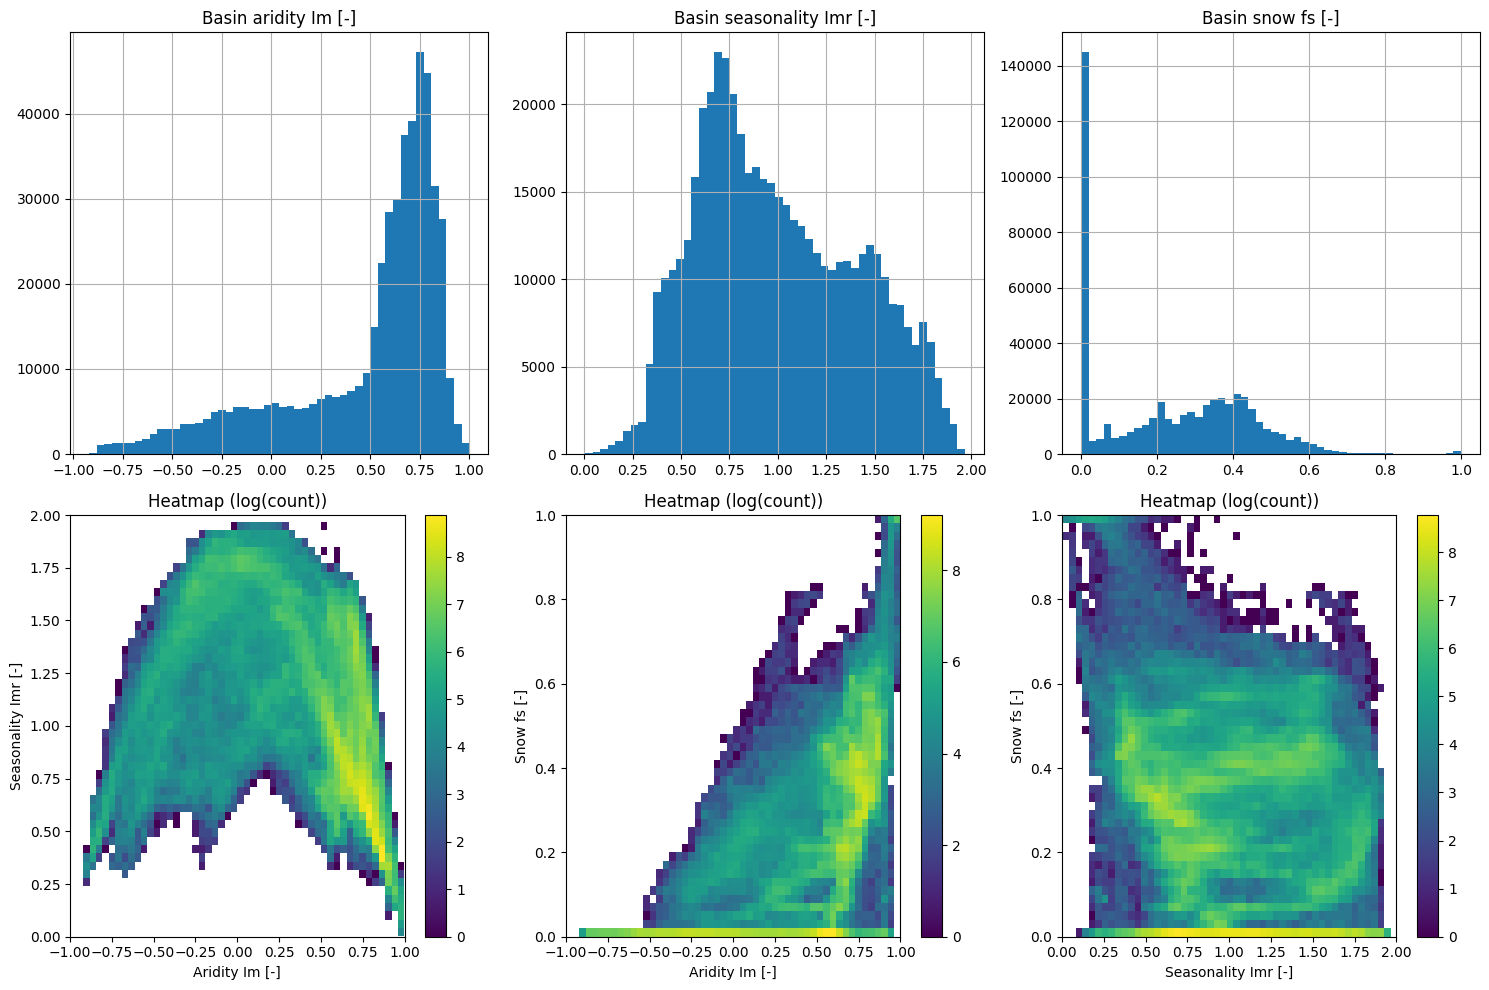

In [7]:
fig, axs = plt.subplots(2,3,figsize=(15,10))

# histograms
ax = axs[0,0]
shp['im_mean'].hist(ax=ax, bins=50)
ax.set_title('Basin aridity Im [-]')

ax = axs[0,1]
shp['imr_mean'].hist(ax=ax, bins=50)
ax.set_title('Basin seasonality Imr [-]')

ax = axs[0,2]
shp['fs_mean'].hist(ax=ax, bins=50)
ax.set_title('Basin snow fs [-]')

# heatmaps
ax = axs[1,0]
pcm = ax.pcolormesh(X_im_imr, Y_im_imr, np.log(H_im_imr))
fig.colorbar(pcm,ax=ax)
ax.set_xlabel('Aridity Im [-]')
ax.set_ylabel('Seasonality Imr [-]')
ax.set_title('Heatmap (log(count))')
ax.set_xlim([-1,1])
ax.set_ylim([0,2])

ax = axs[1,1]
pcm = ax.pcolormesh(X_im_fs, Y_im_fs, np.log(H_im_fs))
fig.colorbar(pcm,ax=ax)
ax.set_xlabel('Aridity Im [-]')
ax.set_ylabel('Snow fs [-]')
ax.set_title('Heatmap (log(count))')
ax.set_xlim([-1,1])
ax.set_ylim([0,1])

ax = axs[1,2]
pcm = ax.pcolormesh(X_imr_fs, Y_imr_fs, np.log(H_imr_fs))
fig.colorbar(pcm,ax=ax)
ax.set_xlabel('Seasonality Imr [-]')
ax.set_ylabel('Snow fs [-]')
ax.set_title('Heatmap (log(count))')
ax.set_xlim([0,2])
ax.set_ylim([0,1])

plt.tight_layout()

In [8]:
### 3d map
%matplotlib widget

In [42]:
r = (shp['im_mean'].values-1)*-1/2
g = shp['imr_mean'].values/2
b = shp['fs_mean'].values
c = np.stack((r, g, b), axis=1)

Text(0.5, 0, 'Snow fs [-]')

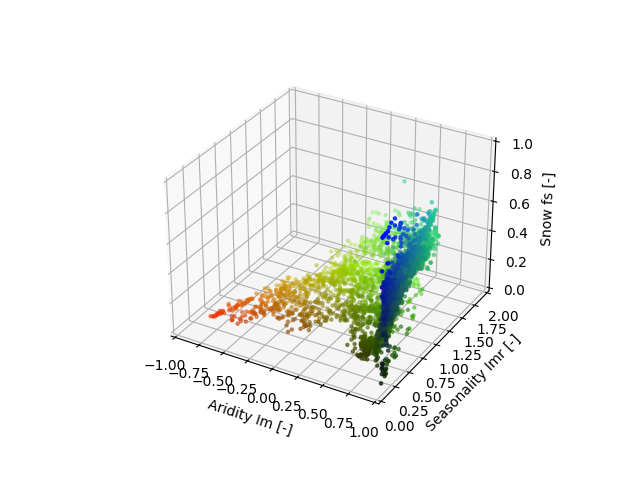

In [56]:
fig =  plt.figure()
ax = fig.add_subplot(projection='3d')

plot_subset = True
if plot_subset:
    subset_size = 5000
    subset = [random.randint(0, len(shp)) for _ in range(subset_size)]
    ax.scatter(shp.iloc[subset]['im_mean'], shp.iloc[subset]['imr_mean'], shp.iloc[subset]['fs_mean'], marker='.', c=c[subset])
else:
    ax.scatter(shp['im_mean'], shp['imr_mean'], shp['fs_mean'], marker='.', c=c)
ax.set_xlim([-1,1])
ax.set_ylim([0,2])
ax.set_zlim([0,1])
ax.set_xlabel('Aridity Im [-]')
ax.set_ylabel('Seasonality Imr [-]')
ax.set_zlabel('Snow fs [-]')

### Add the topographic categories

In [92]:
mask_mountain = (shp['elev_mean'] >  550) & (shp['elev_stdev'] >  100)
mask_plateau  = (shp['elev_mean'] >  550) & (shp['elev_stdev'] <= 100)
mask_hill     = (shp['elev_mean'] <= 550) & (shp['elev_stdev'] >   25)
mask_plain    = (shp['elev_mean'] <= 550) & (shp['elev_stdev'] <=  25)

shp['topo_cat'] = 0
shp.loc[mask_mountain, 'topo_cat'] = 1
shp.loc[mask_plateau, 'topo_cat'] = 2
shp.loc[mask_hill, 'topo_cat'] = 3
shp.loc[mask_plain, 'topo_cat'] = 4

### Perform some counts

In [93]:
# Topography only
#print(f'mountain % = {mask_mountain.sum() / len(shp):0.2}')
#print(f'plateau  % = {mask_plateau.sum() / len(shp):0.2}')
#print(f'hill     % = {mask_hill.sum() / len(shp):0.2}')
#print(f'plain    % = {mask_plain.sum() / len(shp):0.2}')
#
area1 = shp[mask_mountain]['unitarea'].sum() / shp['unitarea'].sum()
area2 = shp[mask_plateau]['unitarea'].sum() / shp['unitarea'].sum()
area3 = shp[mask_hill]['unitarea'].sum() / shp['unitarea'].sum()
area4 = shp[mask_plain]['unitarea'].sum() / shp['unitarea'].sum()
print(f'mountain % = {area1*100:0.2}')
print(f'plateau  % = {area2*100:0.2}')
print(f'hill     % = {area3*100:0.2}')
print(f'plain    % = {area4*100:0.2}')

mountain % = 2.1e+01
plateau  % = 1.7e+01
hill     % = 2.4e+01
plain    % = 3.8e+01


In [90]:
th_im  = 0
th_imr = 1
th_fs  = 0.5

masks = [(shp['im_mean'] <= th_im) & (shp['imr_mean'] >  th_imr) & (shp['fs_mean'] >  th_fs),
         (shp['im_mean'] <= th_im) & (shp['imr_mean'] >  th_imr) & (shp['fs_mean'] <= th_fs),
         (shp['im_mean'] <= th_im) & (shp['imr_mean'] <= th_imr) & (shp['fs_mean'] >  th_fs),
         (shp['im_mean'] <= th_im) & (shp['imr_mean'] <= th_imr) & (shp['fs_mean'] <= th_fs),
         (shp['im_mean'] >  th_im) & (shp['imr_mean'] >  th_imr) & (shp['fs_mean'] >  th_fs),
         (shp['im_mean'] >  th_im) & (shp['imr_mean'] >  th_imr) & (shp['fs_mean'] <= th_fs),
         (shp['im_mean'] >  th_im) & (shp['imr_mean'] <= th_imr) & (shp['fs_mean'] >  th_fs),
         (shp['im_mean'] >  th_im) & (shp['imr_mean'] <= th_imr) & (shp['fs_mean'] <= th_fs)]
for ix,mask in enumerate(masks):
    area = shp[mask]['unitarea'].sum() / shp['unitarea'].sum()
    print(f'{ix:02}. climate area  % = {area*100:0.2}')
    count = mask.sum() / len(shp)
    print(f'{ix:02}. climate count % = {count*100:0.2}\n')

00. climate area  % = 0.0
00. climate count % = 0.0

01. climate area  % = 9.9
01. climate count % = 9.9

02. climate area  % = 0.0
02. climate count % = 0.0

03. climate area  % = 4.5
03. climate count % = 4.5

04. climate area  % = 3.5
04. climate count % = 3.1

05. climate area  % = 3.1e+01
05. climate count % = 2.9e+01

06. climate area  % = 6.0
06. climate count % = 4.9

07. climate area  % = 4.5e+01
07. climate count % = 4.1e+01



In [82]:
mask_arid = shp['im_mean'] <= th_im
mask_not_arid = shp['im_mean'] >  th_im
mask_seasonal = shp['imr_mean'] > th_imr
mask_not_seasonal = shp['im_mean'] <=  th_imr
mask_snow = shp['fs_mean'] > th_fs
mask_not_snow = shp['fs_mean'] <=  th_fs

In [84]:
(mask_arid & mask_not_seasonal & mask_not_snow).sum()

77640

### Plot the climate ranges per topographic category

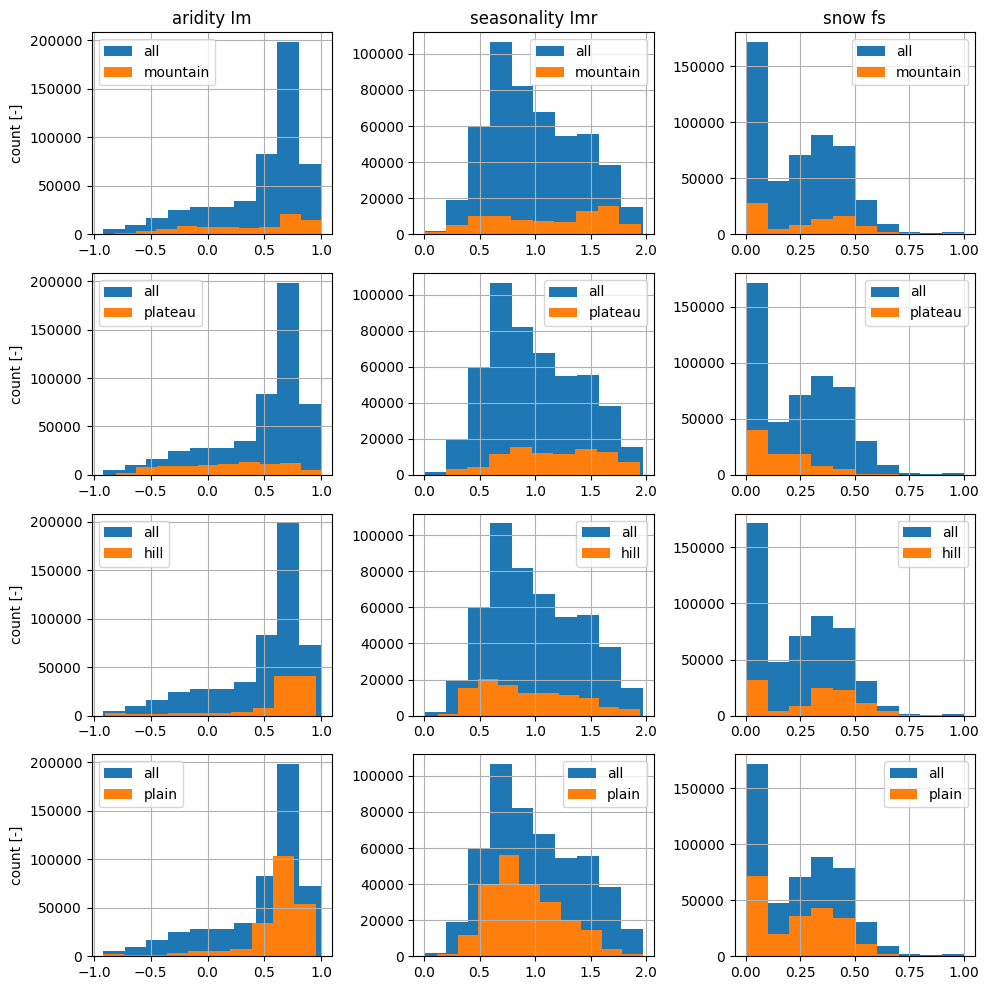

In [9]:
variables = ['im_mean','imr_mean','fs_mean']
variables_leg = ['aridity Im','seasonality Imr','snow fs']
masks = [mask_mountain,mask_plateau,mask_hill,mask_plain]
masks_leg = ['mountain','plateau','hill','plain']

fig, axs = plt.subplots(4,3,figsize=(10,10))
for cx,(var,var_lbl) in enumerate(zip(variables,variables_leg)):
    for rx, (mask, mask_lbl) in enumerate(zip(masks, masks_leg)):
        ax = axs[rx,cx] # selects subplot
        shp[var].hist(ax=ax, label='all')
        shp[mask][var].hist(ax=ax, label=mask_lbl)
        ax.legend()
        if rx == 0: ax.set_title(var_lbl)
        if cx == 0: ax.set_ylabel('count [-]')
plt.tight_layout()